# ATAQUES TERRORISTAS EN ESPAÑA

Lo primero que hacemos es importar librerias e importar los datasets necesarios

In [2]:
import os 
import pandas as pd
import src.source as sr
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
españa = pd.read_csv('input/españa.csv',encoding='latin-1')
terrorism = pd.read_csv('input/globalterrorismdb_0718dist.csv',encoding='latin-1')


/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Vamos a analizar en un primer momento la evolución de los ataques terroristas desde 1970 hasta la actualidad.

## ¿COMO?

Mediante gráficas se verá mucho mejor y compararemos la historia del terrorismo en España con la evolución en el mundo entero.

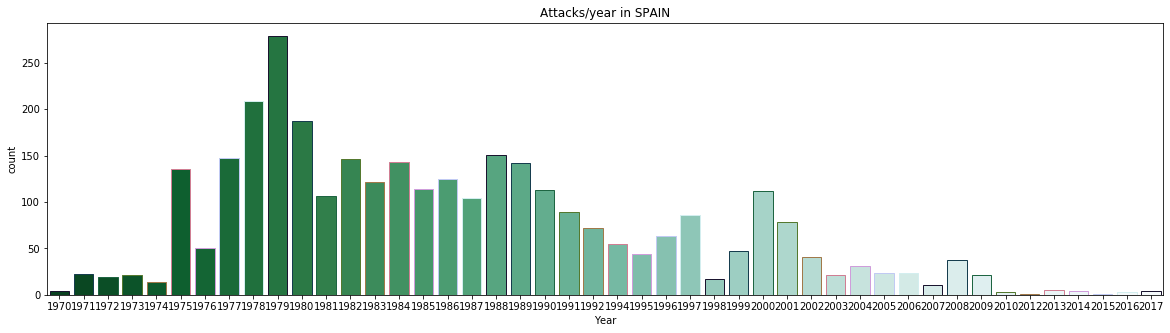

In [5]:
plt.subplots(figsize=(20,5))
sns.countplot('Year',data=españa,palette="BuGn_r",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year in SPAIN')
plt.show()

Se puede observar cómo el auge del terrorismo en españa fue durante la época de la transición.

En España, los ataques terroristas aumentaron con la transición de la democracia, cuando surgieron grupos terroristas o independentistas como ETA o el FRAC.


Text(0.5, 1.0, 'Nº Attacks each year SPAIN')

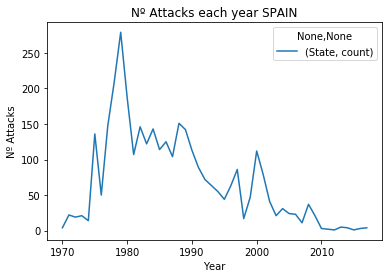

In [6]:
df_3=españa.groupby("Year").agg({"State":["count"]})
df_3.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year SPAIN")

Se puede observar mejor la evolución con un gráfico de línea.

### Ahora veremos la gráfica para los ataques terroristas mundiales

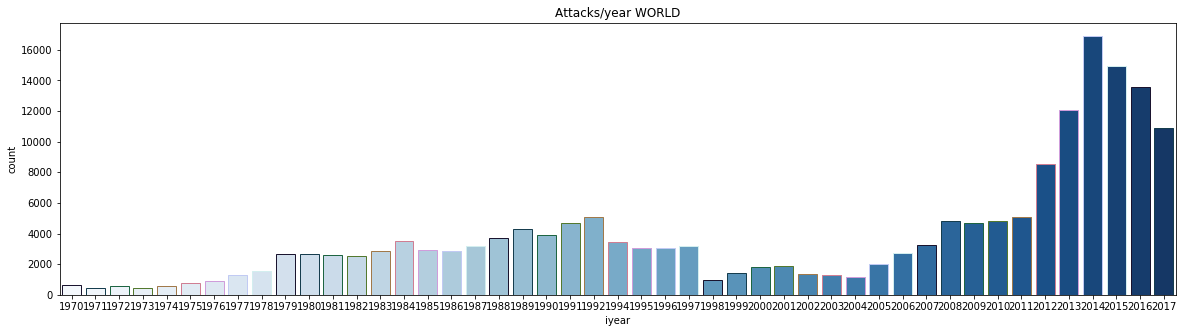

In [8]:
plt.subplots(figsize=(20,5))
sns.countplot('iyear',data=terrorism,palette="Blues",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year WORLD')
plt.show()

Text(0.5, 1.0, 'Nº Attacks each year WORLD')

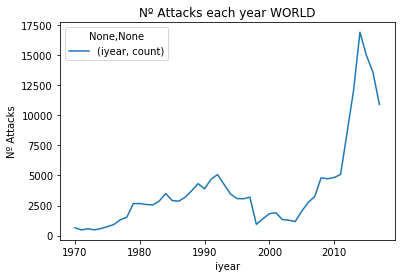

In [11]:
df_4=terrorism.groupby("iyear").agg({"iyear":["count"]})
df_4.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year WORLD")